# PART 2

## IMAGE SEGMENTATION USING K-MEANS CLUSTERING

In [1]:
import cv2 as cv
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
compress_image1 = {}
compress_image2 = {}
K = [2,5,10,15,20]

for i in K:
    if i not in compress_image1.keys():
        compress_image1[i] = []
    if i not in compress_image2.keys():
        compress_image2[i] = []

In [3]:
def read_image(image):
    img = cv.imread(image)
    return img

def process_image(img):
    im = ((cv.cvtColor(img,cv.COLOR_BGR2RGB)).reshape(-1,3)).tolist()
    im1 = np.array(im)
    return im1

In [5]:
def euclidean(x1,x2):
    return np.sqrt(np.sum(np.subtract(x1[:,None],x2)**2,axis=2))

def sample_cluster(im,centroids):
    distances = euclidean(im,centroids)
    return np.argmin(distances,axis=1)

def form_clusters(im,clusters,clusters_ind,centroids):
    ind = sample_cluster(im,centroids)
    for i in range(len(clusters)):
        clusters[i] = np.array([im[x] for x in np.where(ind==i)[0]])
        clusters_ind[i] = np.array([x for x in np.where(ind==i)[0]])
    return clusters, clusters_ind

def new_centroids(clusters,centroids):
    for i in range(len(clusters)):
        new_centroid = np.mean(clusters[i],axis=0).tolist()
        centroids[i] = new_centroid
    return centroids

In [6]:
def label_pixels(im,clusters_ind):
    labels = np.zeros(len(im))
    for i,index in enumerate(clusters_ind):
        labels[index] = i
    labels = labels.astype(int)
    return labels

def image_seg(im,centroids,clusters_ind,img):
    labels = label_pixels(im,clusters_ind)
    y = labels.flatten()
    new_image = centroids[y.flatten()]
    new = new_image.reshape(img.shape)
    return new

def plot_images(img,new_images,K):
    plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
    plt.show()
    for i in range(len(K)):
        print("Image Segmentation for k: {}".format(K[i]))
        plt.imshow(new_images[i])
        plt.show()
    return

In [7]:
def KMeans_Clustering(im,k,max_iters):
    c = np.random.choice(len(im),k)
    centroids = [im[i] for i in c]
    clusters = [[] for i in range(k)]
    clusters_ind = [[] for i in range(k)]
    
    for i in range(max_iters):
        old_centroids = centroids
        clusters_1, clusters_ind_1 = form_clusters(im,clusters,clusters_ind,centroids)
        clusters = clusters_1
        clusters_ind = clusters_ind_1
        centroids = new_centroids(clusters,centroids)
        if (np.uint8(old_centroids) == np.uint8(centroids)).all():
            break
            
    return centroids,clusters_ind,clusters

In [8]:
def KMeans_ImageSegmentation(image_1,K):
    max_iters = 100
    img = read_image(image_1)
    im = process_image(img)
    cr_image = []
    new_images = []
    for k_val in range(len(K)):
        centroids, clusters_ind, clusters = KMeans_Clustering(im,K[k_val],max_iters)
        new = image_seg(im,np.uint8(centroids),clusters_ind,img)
        new_1 = cv.cvtColor(img,cv.COLOR_BGR2RGB)
        new_images.append(new)
        cr_image.append(sys.getsizeof(new)/sys.getsizeof(new_1))
    plot_images(img,new_images,K)
    return cr_image

In [9]:
image_1 = r"/Users/bhavyaalekhya/Desktop/Courses/Fall_2022/CS6375/Homeworks/HW3/hw3_part2_data/Koala.jpg"

In [10]:
image_2 = r"/Users/bhavyaalekhya/Desktop/Courses/Fall_2022/CS6375/Homeworks/HW3/hw3_part2_data/Penguins.jpg"

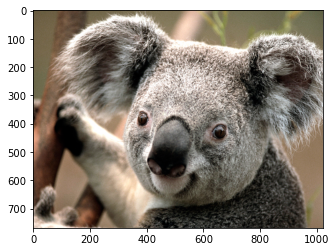

Image Segmentation for k: 2


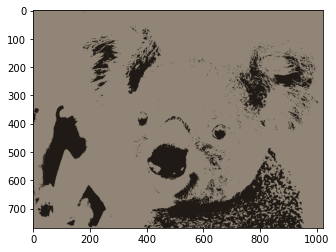

Image Segmentation for k: 5


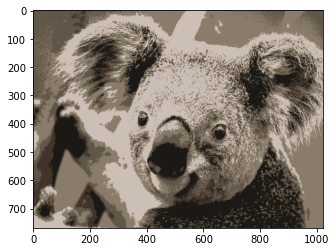

Image Segmentation for k: 10


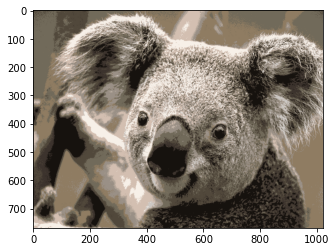

Image Segmentation for k: 15


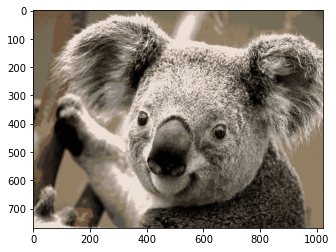

Image Segmentation for k: 20


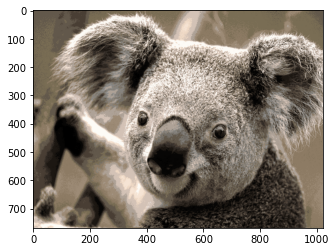

In [33]:
cr_image = KMeans_ImageSegmentation(image_1,K)

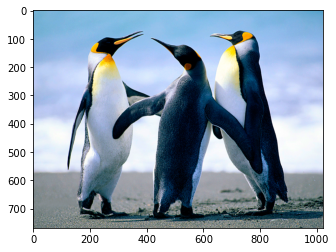

Image Segmentation for k: 2


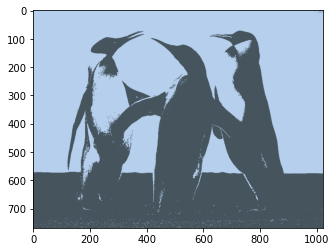

Image Segmentation for k: 5


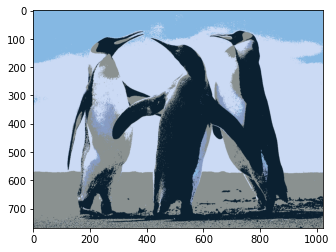

Image Segmentation for k: 10


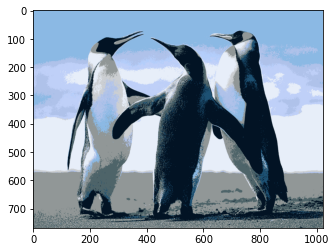

Image Segmentation for k: 15


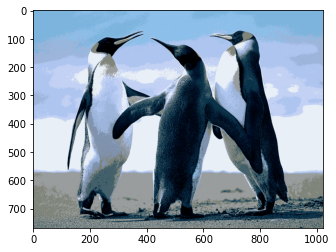

Image Segmentation for k: 20


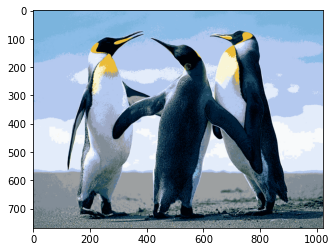

In [34]:
cr_image2 = KMeans_ImageSegmentation(image_2,K)

In [35]:
for i in range(len(K)):
    compress_image1[K[i]].append(cr_image[i])
    compress_image2[K[i]].append(cr_image2[i])

In [89]:
avg_c1 = round(np.mean([np.mean(compress_image1[i]) for i in compress_image1.keys()])*100,4)

avg_c2 = round(np.mean([np.mean(compress_image1[i]) for i in compress_image1.keys()])*100,4)

var_c1 = round(np.var([np.mean(compress_image1[i]) for i in compress_image1.keys()]),40)

var_c2 = round(np.var([np.mean(compress_image1[i]) for i in compress_image1.keys()]),40)

In [90]:
avg_c1

0.0058

In [91]:
avg_c2

0.0058

In [92]:
var_c1

0.0

In [93]:
var_c2

0.0